<a href="https://colab.research.google.com/github/iamfernandareis/nivel-1-telos/blob/main/simulador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Exericio 1

Qual é a loja com a maior média de vendas em 2023?

In [24]:
vendas_2023 = pd.read_excel("/content/dados/vendas_2023.xlsx")

# Calcular a média de vendas para cada loja
vendas_2023['Média'] = vendas_2023.loc[:, '31/01/2023':'31/12/2023'].mean(axis=1)

# Encontrar a loja com a maior média
loja_maior_media = vendas_2023.loc[vendas_2023['Média'].idxmax(), 'Cidade']


print(f'A loja com a maior média de vendas em 2023 foi: {loja_maior_media}')


A loja com a maior média de vendas em 2023 foi: Fortaleza


Exericio 02

 Represente o ranking da média de vendas das lojas com um gráfico de barras.

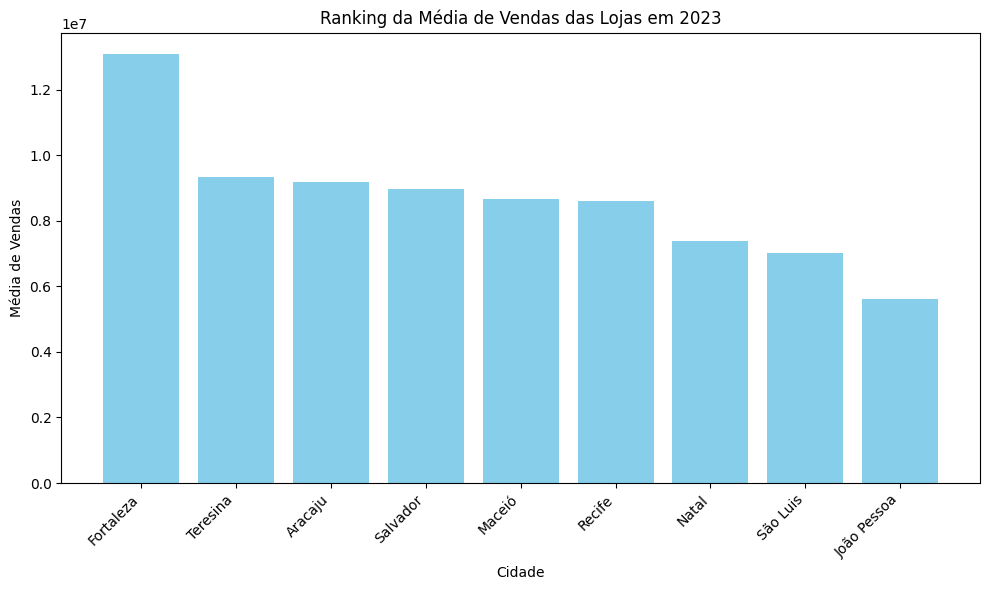

In [25]:
vendas_ordenadas = vendas_2023.sort_values(by='Média', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(vendas_ordenadas['Cidade'], vendas_ordenadas['Média'], color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('Média de Vendas')
plt.title('Ranking da Média de Vendas das Lojas em 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Exercicio 03

De acordo com a pesquisa de mercado feita,quais lojas são conhecidas em sua cidade e quais não são?

(para que uma loja seja considerada conhecida, a maior parte das pessoas na pesquisa deve dizer que conhece a loja, ou seja,
a resposta afirmativa deve ser a moda)

In [26]:
dados_pesquisa = pd.read_excel("/content/dados/pesquisa_populacao.xlsx")
dados_pesquisa = dados_pesquisa.drop(columns=["Nome"])

Totais de "SIM" e "NÃO" por cidade:

In [27]:


contagem_respostas = dados_pesquisa.groupby('Cidade')['Conhece a concessionária?'].value_counts().unstack(fill_value=0)

contagem_respostas.columns = ['Nao', 'Sim']


contagem_respostas

,Nao,Sim
Cidade,,
Aracaju,23,7
Fortaleza,8,22
João Pessoa,18,12
Maceió,22,8
Natal,19,11
Recife,16,14
Salvador,18,12
São Luis,16,14
Teresina,20,10


In [28]:
resp_sim = dados_pesquisa[dados_pesquisa['Conhece a concessionária?'] == 'Sim']
resp_nao = dados_pesquisa[dados_pesquisa['Conhece a concessionária?'] == 'Não']
contagem_sim = resp_sim['Cidade'].value_counts()
contagem_nao = resp_nao['Cidade'].value_counts()

cidade_moda_sim = resp_sim['Cidade'].mode()[0] #cidade que mais recebeu sim
cidade_moda_nao = resp_nao['Cidade'].mode()[0] #cidade que mais recebeu nao

qtd_sim = contagem_sim.max()
qtd_nao = contagem_nao.max()


Resposta:

In [29]:
print(f'A cidade mais conhecida é: {cidade_moda_sim}') #cidade que mais recebeu sim
print(f'Número de vezes que recebeu "Sim": {qtd_sim}')
print()
print(f'A cidade menos conhecida é: {cidade_moda_nao}') #cidade que mais recebeu nao
print(f'Número de vezes que recebeu "Não": {qtd_nao}')

A cidade mais conhecida é: Fortaleza
Número de vezes que recebeu "Sim": 22

A cidade menos conhecida é: Aracaju
Número de vezes que recebeu "Não": 23


Exercicio 04

Quais lojas estão no quartil que tem as piores médias de vendas de 2023?

In [30]:
vendas_2023 = pd.read_excel("/content/dados/vendas_2023.xlsx")
vendas_2023['Média'] = vendas_2023.loc[:, '31/01/2023':'31/12/2023'].mean(axis=1)

quartis = vendas_2023['Média'].quantile([0.25, 0.5, 0.75]).round()
quartis

,Média
0.25,7377102.0
0.50,8661689.0
0.75,9188259.0


In [31]:
piores_lojas = vendas_2023[vendas_2023['Média'] <= quartis[0.25]]

print("Lojas no quartil com as piores médias de vendas:\n")
print(piores_lojas[['Cidade', 'Média']].round())

Lojas no quartil com as piores médias de vendas:

        Cidade      Média
3  João Pessoa  5597477.0
4     São Luis  7011196.0


Exercicio 05

- Quais lojas do pior quartil é a mais inconstante em suas vendas?

In [32]:
vendas_array = piores_lojas.loc[:, '31/01/2023':'31/12/2023'].values
desvios_padrao = np.std(vendas_array, axis=1)

# Adiciona o desvio padrão ao DataFrame usando .loc
piores_lojas.loc[:, 'Desvio_Padrao'] = desvios_padrao

indice_max_variacao = piores_lojas['Desvio_Padrao'].idxmax()
loja_mais_inconstante = piores_lojas.loc[indice_max_variacao, 'Cidade']

print(f"A loja do pior quartil mais inconstante em suas vendas é: {loja_mais_inconstante}")

A loja do pior quartil mais inconstante em suas vendas é: São Luis


<ipython-input-32-81fa8519f617>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piores_lojas.loc[:, 'Desvio_Padrao'] = desvios_padrao


Exercicio 06

De acordo com os dados temporais apresentados,como serão as
vendas dos próximos 3 anos para a região nordeste da empresa?


In [33]:
vendas_temporais = pd.read_excel("/content/dados/total_vendas.xlsx")
vendas_temporaisvendas_temporais = pd.read_excel("/content/dados/total_vendas.xlsx")
vendas_temporais

,Ano,Total de Vendas
0,2004,8.416882e+08
1,2005,8.466351e+08
2,2006,8.515821e+08
3,2007,8.565290e+08
4,2008,8.614759e+08
5,2009,8.664229e+08
6,2010,8.713698e+08
7,2011,8.763167e+08
8,2012,8.812637e+08
9,2013,8.862106e+08


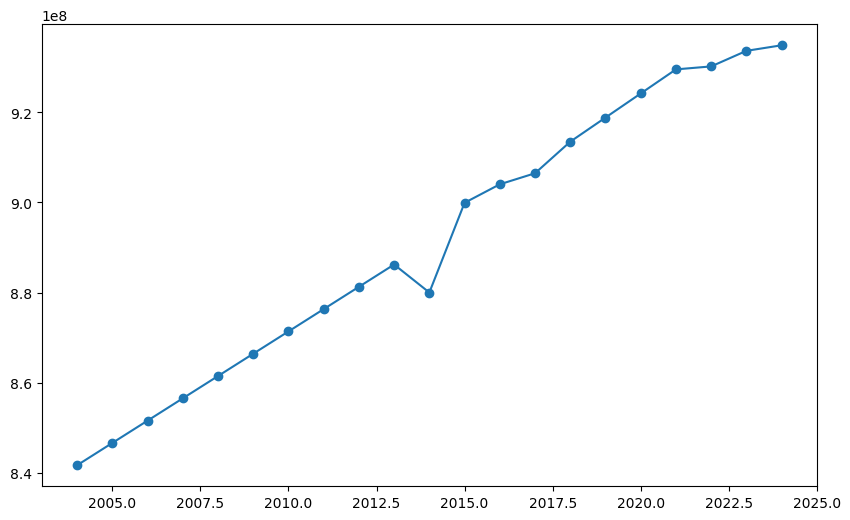

In [34]:
plt.figure(figsize=(10,6))
plt.plot(vendas_temporais["Ano"], vendas_temporais["Total de Vendas"], marker="o")


In [35]:
vendas_temporais_copia =  vendas_temporais.copy()

vendas_temporais_copia["MM_3"] = vendas_temporais_copia["Total de Vendas"].rolling(window=3).mean().round()


previsao = vendas_temporais_copia["MM_3"].iloc[-1] + (vendas_temporais_copia["MM_3"].iloc[-1] - vendas_temporais_copia["MM_3"].iloc[-2])




Resposta:

In [36]:
previsao

934641778.0

Exercicio 07

Utilize dados de lojas do resto do Brasil para treinar um modelo de
regressão linear e então utilize-o para tentar prever a probabilidade de
um cliente voltar a fazer negócio com as lojas do nordeste de acordo com
o seu nível de satisfação

In [37]:
satisfacao_clientes = pd.read_excel("/content/dados/satisfacao_clientes.xlsx")

In [38]:
import statsmodels.api as sm

In [39]:

nordeste = satisfacao_clientes[satisfacao_clientes['Loja'].isin(['Fortaleza', 'Recife', 'Natal', 'João Pessoa', 'São Luis', 'Teresina', 'Aracaju', 'Maceió', 'Salvador'])]
resto_brasil = satisfacao_clientes[~satisfacao_clientes['Loja'].isin(['Fortaleza', 'Recife', 'Natal', 'João Pessoa', 'São Luis', 'Teresina', 'Aracaju', 'Maceió', 'Salvador'])]


In [40]:
y = resto_brasil["Probabilidade do cliente retornar (0% - 100%)"]
X = resto_brasil[["Satisfação dos clientes (1 - 100)"]]
X = sm.add_constant(X)

In [41]:
modelo = sm.OLS(y, X).fit()

In [42]:
X_nordeste = nordeste[["Satisfação dos clientes (1 - 100)"]]
X_nordeste = sm.add_constant(X_nordeste, has_constant='add')  # Adicionar constante

In [43]:
nordeste["Previsao"] = modelo.predict(X_nordeste)

<ipython-input-43-11ec122533cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nordeste["Previsao"] = modelo.predict(X_nordeste)


A probabilidade de um cliente voltar a fazer negócio com as lojas do nordeste é de:

In [44]:
nordeste.drop(columns=["Probabilidade do cliente retornar (0% - 100%)"])

,Loja,Satisfação dos clientes (1 - 100),Previsao
10,Teresina,30,27.953586
19,Fortaleza,100,76.200422
20,Recife,20,21.061181
21,Natal,80,62.415612
22,João Pessoa,60,48.630802
23,São Luis,30,27.953586
24,Teresina,10,14.168776
25,Aracaju,70,55.523207
26,Maceió,90,69.308017
27,Salvador,50,41.738397
